<a href="https://colab.research.google.com/github/mostafasayedd/mostafasayedd/blob/main/Copy_of_Yet_another_copy_of_untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving hollywood movies.xlsx to hollywood movies.xlsx

First 5 Rows of the Dataset:
         Movie_Name Release_Period Whether_Remake Whether_Franchise     Genre  \
0       Golden Boys         Normal             No                No  suspense   
1     Kaccha Limboo        Holiday             No                No     drama   
2  Not A Love Story        Holiday             No                No  thriller   
3        Qaidi Band        Holiday             No                No     drama   
4         Chaatwali        Holiday             No                No     adult   

  New_Actor New_Director New_Music_Director         Lead_Star  \
0       Yes           No                 No      Jeet Goswami   
1       Yes           No                Yes  Karan Bhanushali   
2        No           No                 No        Mahie Gill   
3       Yes           No                 No        Aadar Jain   
4       Yes          Yes                Yes        Aadil Khan   

          Director   Music_Director  N

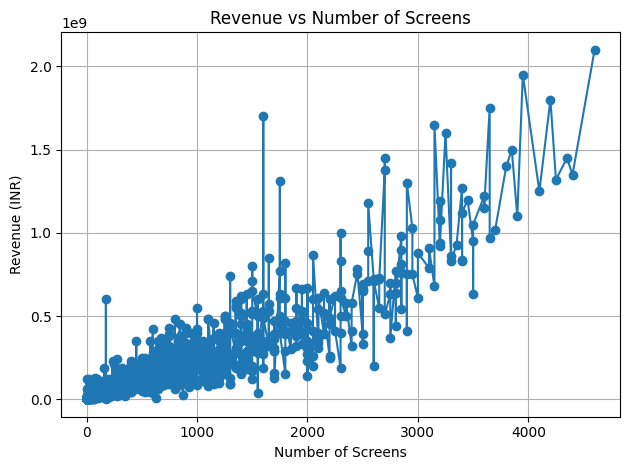

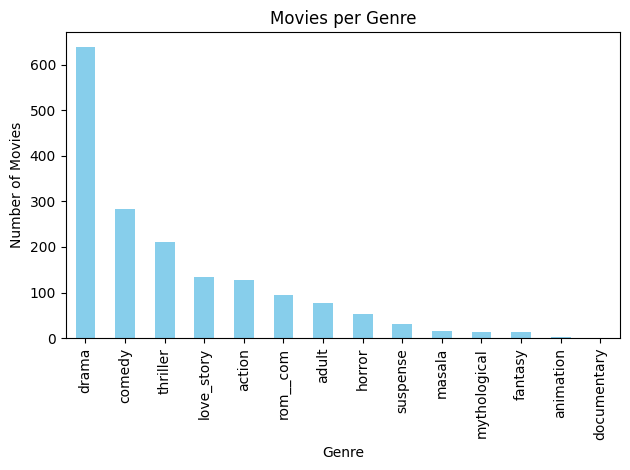


Error reading CSV file: [Errno 2] No such file or directory: '/kaggle/input/netflix-shows/netflix_titles.csv'


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import read_csv

df = pd.read_excel('hollywood movies.xlsx')

print("\nFirst 5 Rows of the Dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Description:")
print(df.describe())
# قراءة البيانات
# import pandas as pd
# df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
# عرض أول 5 صفوف
# df.head()
# معلومات عن الأعمدة
# df.info()
# وصف عددي للبيانات
# df.describe()


print("\nMissing Values in Each Column:")
print(df.isnull().sum())

required_cols = ['rating', 'release_year']
missing_cols = [col for col in required_cols if col not in df.columns]
if not missing_cols:
    df.dropna(subset=required_cols, inplace=True)
    df['release_year'] = df['release_year'].astype(int)
else:
    print(f"\nSkipping dropna for missing columns: {missing_cols}")

if 'type' in df.columns:
    df['type'] = df['type'].map({'Movie': 1, 'TV Show': 0})
# التحقق من القيم المفقودة
# df.isnull().sum()
# حذف الصفوف التي تحتوي على قيم مفقودة في أعمدة مهمة
# df.dropna(subset=['rating', 'release_year'], inplace=True)

# تحويل نوع البيانات
# df['release_year'] = df['release_year'].astype(int)

# ترميز النوع: Movie = 1, TV Show = 0
# df['type'] = df['type'].map({'Movie': 1, 'TV Show': 0})


df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print("\nColumn Names:")
print(df.columns)

for col in ['Number_of_Screens', 'Revenue(INR)']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

existing_numeric_cols = [col for col in ['Number_of_Screens', 'Revenue(INR)'] if col in df.columns]
if existing_numeric_cols:
    df.dropna(subset=existing_numeric_cols, inplace=True)

print("\nData Types of Each Column:")
print(df.dtypes)

for column in df.columns:
    print(f"\nColumn: {column}")
    print(df[column].head(10))

if 'Number_of_Screens' in df.columns and 'Revenue(INR)' in df.columns:
    df_sorted = df.sort_values(by='Number_of_Screens')
    plt.plot(df_sorted['Number_of_Screens'], df_sorted['Revenue(INR)'], marker='o')
    plt.xlabel('Number of Screens')
    plt.ylabel('Revenue (INR)')
    plt.title('Revenue vs Number of Screens')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\nColumns for plotting Revenue vs Screens not found.")

if 'Genre' in df.columns:
    genre_counts = df['Genre'].value_counts()
    genre_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.title('Movies per Genre')
    plt.tight_layout()
    plt.show()
else:
    print("\nColumn 'Genre' not found in the dataset.")

try:
    dataset = read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
    dataset.hist(figsize=(10, 8))
    pyplot.tight_layout()
    pyplot.show()
except Exception as e:
    print(f"\nError reading CSV file: {e}")

# # استيراد المكتبات
# from matplotlib import pyplot
# from pandas import read_csv
#
# # قراءة البيانات
# dataset = read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
#
# # رسم هيستوجرام
# dataset.hist()
# pyplot.show()